## STEP 1 

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")


## STEP 2

In [14]:
# Load the cleaned dataset
file_path = "Cleaned_data_set.csv"  
data = pd.read_csv(file_path)

# Display the first few rows to verify the data
data.head()


,Age,Gender,Ethnicity,Region,Socioeconomic Status,Symptom Description,Symptom Severity,Duration of Symptoms (days),Additional Symptoms,Chronic Condition,Allergies,Potential Condition,Suggested Action,Insurance Status
0,30.000000,Female,Other,Suburban,High,chest pain,7.000000,23.0,fever,Diabetes,Peanuts,anxiety,visit doctor,No
1,63.000000,Male,Caucasian,Urban,Middle,mild headache,1.000000,5.0,nausea,Diabetes,Dust,diabetes,take home care measures,Yes
2,70.000000,Other,Other,Urban,High,blurry vision,5.474787,19.0,fatigue,Diabetes,Peanuts,flu,take home care measures,No
3,32.000000,Male,African American,Rural,High,fever and body aches,2.000000,1.0,fever,Diabetes,Peanuts,common cold,visit doctor,No
4,53.238168,Other,African American,Rural,Middle,fatigue and weakness,4.000000,7.0,muscle aches,Diabetes,Penicillin,arthritis,take home care measures,No


## STEP 3

In [15]:
# Overview of dataset structure
data.info()

# Check for missing values
print(data.isnull().sum())

# Summary statistics for numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1500 non-null   float64
 1   Gender                       1500 non-null   object 
 2   Ethnicity                    1500 non-null   object 
 3   Region                       1500 non-null   object 
 4   Socioeconomic Status         1500 non-null   object 
 5   Symptom Description          1500 non-null   object 
 6   Symptom Severity             1500 non-null   float64
 7   Duration of Symptoms (days)  1500 non-null   float64
 8   Additional Symptoms          1500 non-null   object 
 9   Chronic Condition            1500 non-null   object 
 10  Allergies                    1500 non-null   object 
 11  Potential Condition          1500 non-null   object 
 12  Suggested Action             1500 non-null   object 
 13  Insurance Status  

,Age,Symptom Severity,Duration of Symptoms (days)
count,1500.000000,1500.000000,1500.000000
mean,53.238168,5.474787,16.028505
std,20.079955,2.645049,7.968749
min,18.000000,1.000000,1.000000
25%,37.000000,3.000000,10.000000
50%,53.238168,5.474787,16.028505
75%,69.000000,7.000000,22.000000
max,90.000000,10.000000,30.000000


## 5. Explore Feature Distributions


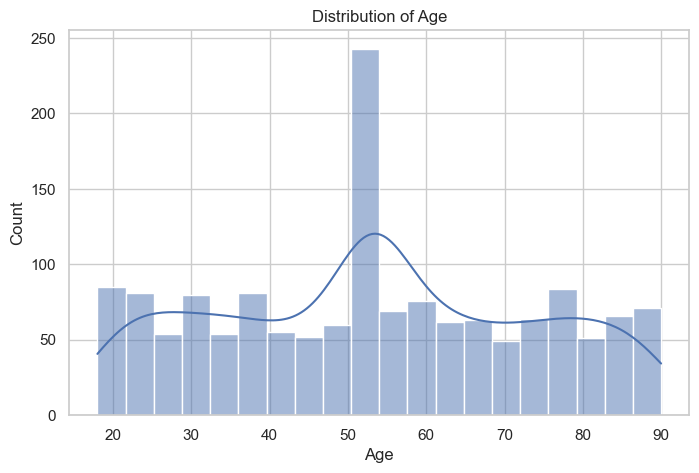

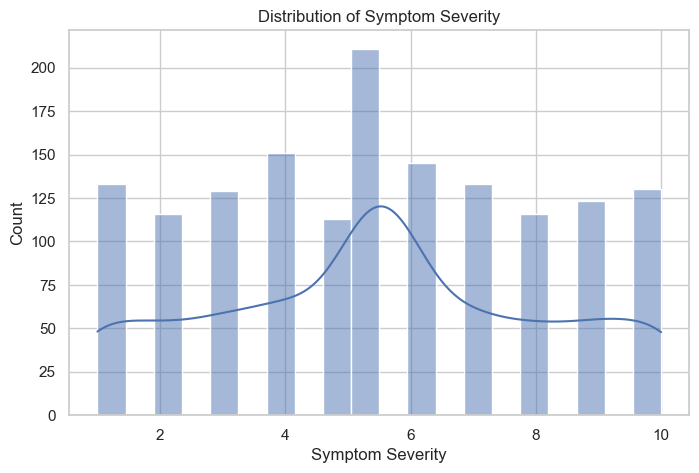

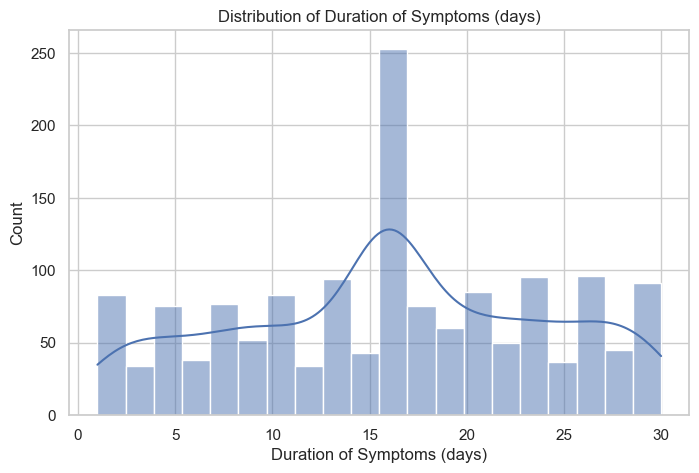

In [16]:
# Visualise numerical feature distributions
numerical_features = ['Age', 'Symptom Severity', 'Duration of Symptoms (days)']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


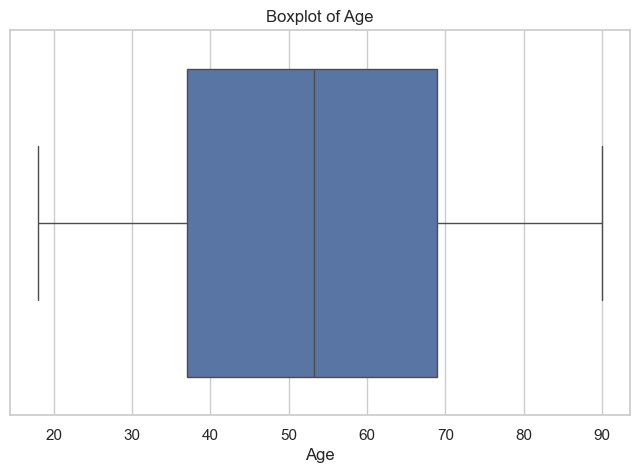

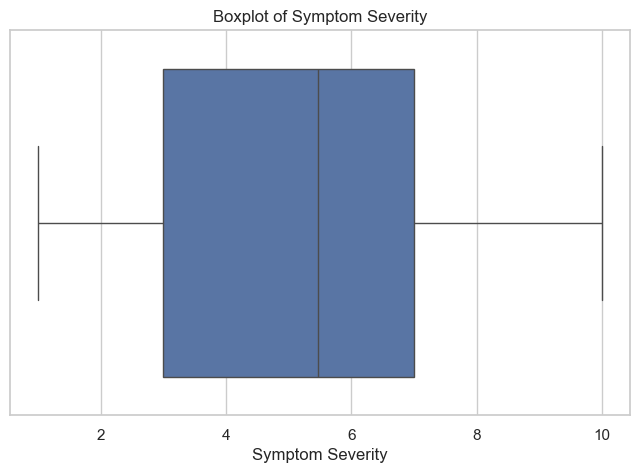

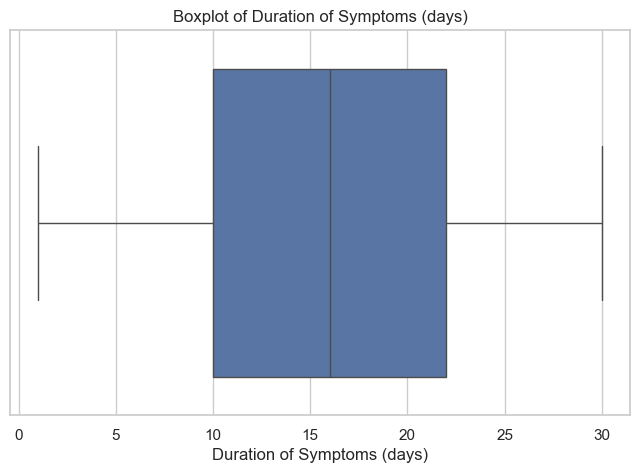

In [17]:
# Checking for outliers 
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


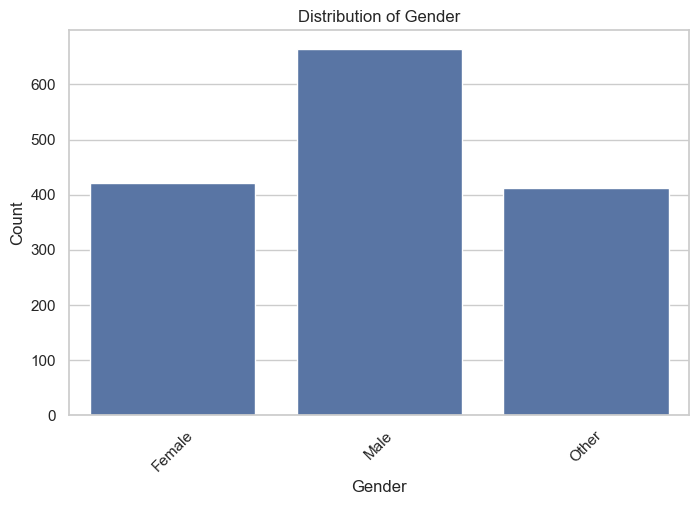

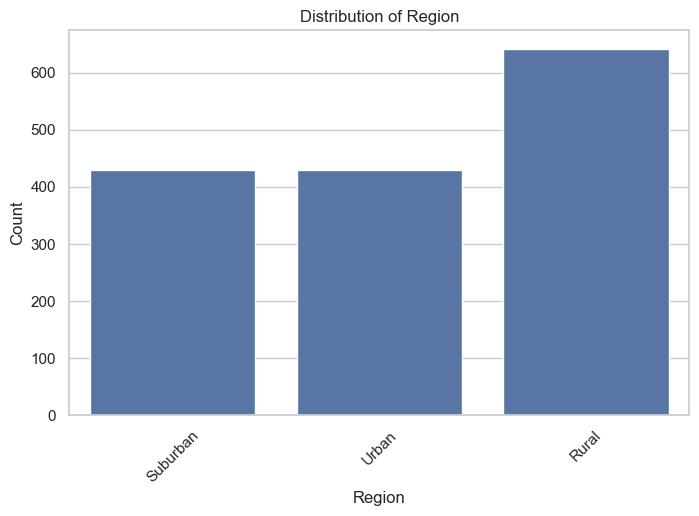

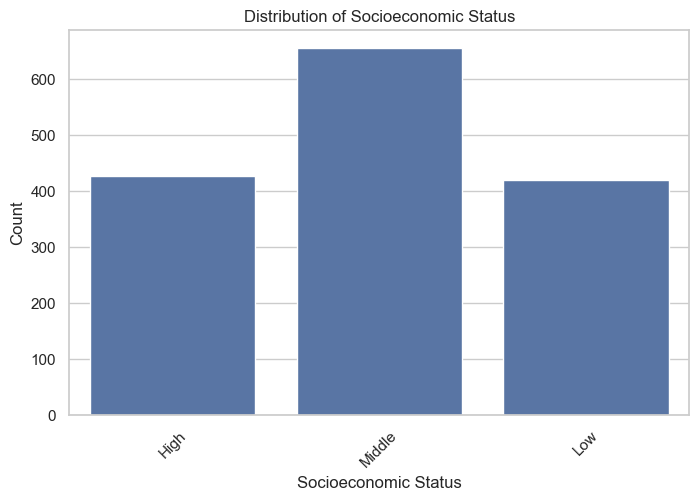

In [18]:
#Analyse Categorical Features: Use bar plots to examine the distribution of categorical features like Gender, Region, and Socioeconomic Status.
categorical_features = ['Gender', 'Region', 'Socioeconomic Status']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


## 6. Analyse Relationships


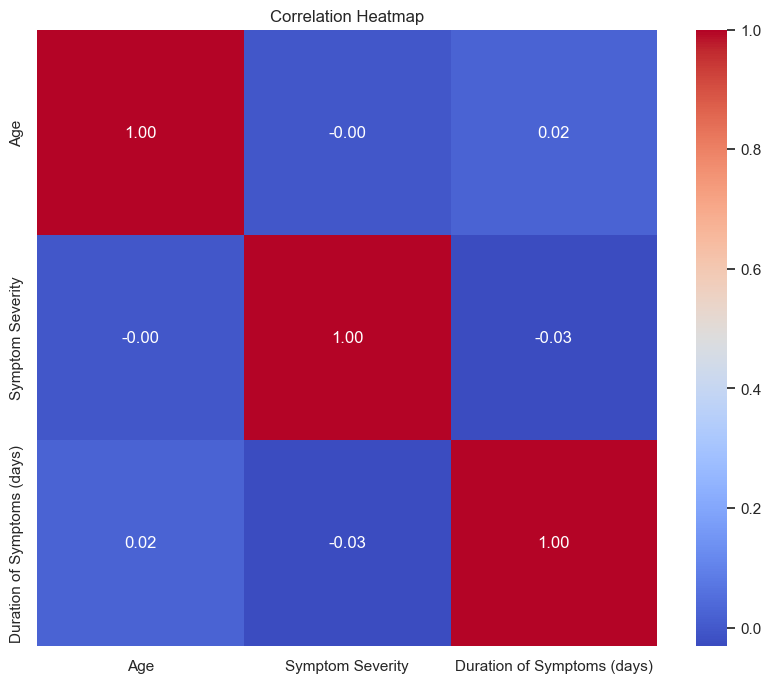

In [19]:
#Correlation Heatmap: Analyse relationships between numerical features using a heatmap.

# Filter numeric columns only
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Generate correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Insights from Correlation Heatmap
- `Age`, `Symptom Severity`, and `Duration of Symptoms (days)` show minimal correlation with one another.
- The independence of these features suggests they each provide unique information to the model, which can improve its predictive capability.


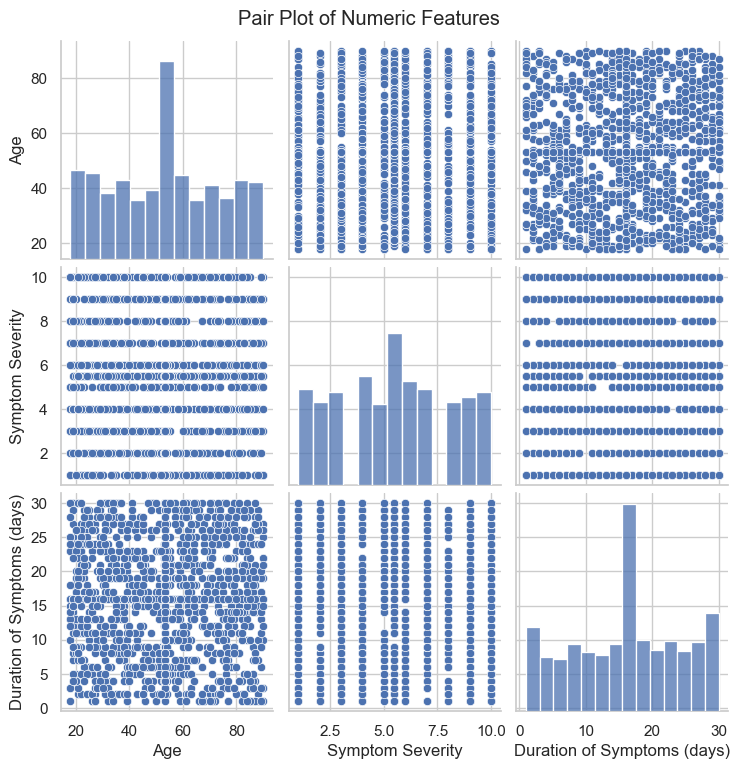

In [20]:
sns.pairplot(data[['Age', 'Symptom Severity', 'Duration of Symptoms (days)']])
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()


### Insights from the Pair Plot
- **Feature Distributions:**
  - Age is distributed relatively evenly, indicating a good representation across different age groups.
  - Symptom Severity appears clustered around distinct values, suggesting it might be categorical or ordinal.
  - Duration of Symptoms (days) shows peaks around specific durations, indicating common patterns in symptom timelines.

- **Relationships Between Features:**
  - There is no strong linear relationship between Age and Symptom Severity, suggesting these are independent variables.
  - Age and Duration of Symptoms (days) also show minimal correlation.
  - Symptom Severity and Duration of Symptoms (days) have weak or no visible correlation.

These findings confirm that the features are relatively independent and provide unique information for model training.


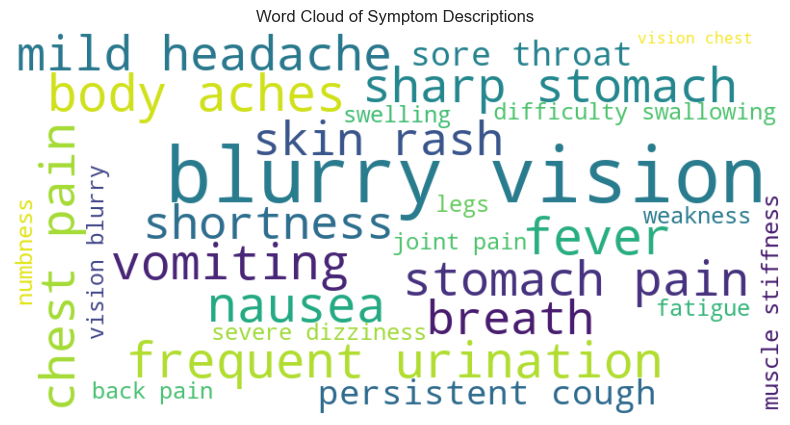

In [24]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Symptom Description' column
text = " ".join(entry for entry in data['Symptom Description'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Symptom Descriptions')
plt.show()
